## Imports

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

## Load Data

### CrowdCharge Transaction Data

In [2]:
CC_transaction_data = pd.read_excel('data/electric_nation/CrowdChargeTransactions.xlsx', sheet_name='Transaction Data')
CC_transaction_data.head()

,TransactionID,ChargerID,ParticipantID,CarKW,CarKWh,StartTime,StopTime,GroupID,Trial,AdjustedStartTime,...,ChargingDuration,t_inactive_start,t_inactive_end,Used_a_Timer,Began_in_weekday_evening_peak,Hot_Unplug,T1_Managed,T2_Managed,Restricton T1,Restriction T2
0,100000,35000117,EN1306,7.0,33.0,2017-05-04 19:02:00,2017-05-05 08:47:00,NaN,NaN,2017-05-04 20:02:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100001,35000117,EN1306,7.0,33.0,2017-05-05 17:15:00,2017-05-06 09:53:00,NaN,NaN,2017-05-05 18:15:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002,35000117,EN1306,7.0,33.0,2017-05-11 16:44:00,2017-05-12 06:18:00,NaN,NaN,2017-05-11 17:44:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,35000117,EN1306,7.0,33.0,2017-05-15 18:47:00,2017-05-16 06:13:00,NaN,NaN,2017-05-15 19:47:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100004,35000117,EN1306,7.0,33.0,2017-05-17 15:32:00,2017-05-18 06:44:00,NaN,NaN,2017-05-17 16:32:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
CC_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71264 entries, 0 to 71263
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   TransactionID                  71264 non-null  int64         
 1   ChargerID                      71264 non-null  int64         
 2   ParticipantID                  67365 non-null  object        
 3   CarKW                          67365 non-null  float64       
 4   CarKWh                         67365 non-null  float64       
 5   StartTime                      71264 non-null  datetime64[ns]
 6   StopTime                       71264 non-null  datetime64[ns]
 7   GroupID                        47230 non-null  object        
 8   Trial                          47230 non-null  float64       
 9   AdjustedStartTime              71264 non-null  datetime64[ns]
 10  AdjustedStopTime               71264 non-null  datetime64[ns]
 11  PluggedInTime  

In [4]:
CC_transaction_data.columns

Index(['TransactionID', 'ChargerID', 'ParticipantID', 'CarKW', 'CarKWh',
       'StartTime', 'StopTime', 'GroupID', 'Trial', 'AdjustedStartTime',
       'AdjustedStopTime', 'PluggedInTime', 'ConsumedkWh',
       'Part_of_Managed_Group', 'Weekday_or_Weekend', 'ActiveCharging_Start',
       'Max_Current_Drawn_for_T', 'EndCharge', 'ChargingDuration',
       't_inactive_start', 't_inactive_end', 'Used_a_Timer',
       'Began_in_weekday_evening_peak', 'Hot_Unplug', 'T1_Managed',
       'T2_Managed', 'Restricton T1', 'Restriction T2'],
      dtype='object')

### GreenFlux Transaction Data

In [5]:
GF_transaction_data = pd.read_excel('data/electric_nation/GreenFluxTransactions.xlsx', sheet_name='Transaction Data')
GF_transaction_data.head()

,TransactionID,ChargerID,ParticipantID,ParticipantCarkW,ParticipantCarkWh,StartTime,StopTime,GroupID,Trial,AdjustedStartTime,...,MaxAmpsDrawnForT,EndCharge,ChargingDuration,tInactiveStart,tInactiveEnd,UsedATimer,BeganInWeekdayEveningPeak,HotUnplug,Managed,PercentageTimeInTransactionManaged
0,1,UK-GFX-ENA0001,EN1073,7.0,33.0,2017-01-12 15:21:00,2017-01-12 15:23:00,NaN,NaN,2017-01-12 15:21:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,UK-GFX-ENA0001,EN1073,7.0,33.0,2017-01-17 09:46:00,2017-01-17 09:51:00,NaN,NaN,2017-01-17 09:46:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,UK-GFX-ENA0009,EN1116,7.0,33.0,2017-01-24 13:51:00,2017-01-24 13:52:00,NaN,NaN,2017-01-24 13:51:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,UK-GFX-ENA0010,EN1083,7.0,33.0,2017-01-24 14:16:00,2017-01-24 14:17:00,NaN,NaN,2017-01-24 14:16:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,UK-GFX-ENA0014,EN1018,3.6,9.9,2017-01-25 07:37:00,2017-01-25 07:38:00,NaN,NaN,2017-01-25 07:37:00,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
GF_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86256 entries, 0 to 86255
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   TransactionID                       86256 non-null  int64         
 1   ChargerID                           86256 non-null  object        
 2   ParticipantID                       86256 non-null  object        
 3   ParticipantCarkW                    86256 non-null  float64       
 4   ParticipantCarkWh                   86256 non-null  float64       
 5   StartTime                           86256 non-null  datetime64[ns]
 6   StopTime                            86256 non-null  datetime64[ns]
 7   GroupID                             56687 non-null  object        
 8   Trial                               56687 non-null  float64       
 9   AdjustedStartTime                   86256 non-null  datetime64[ns]
 10  AdjustedStopTime      

In [7]:
GF_transaction_data.columns

Index(['TransactionID', 'ChargerID', 'ParticipantID', 'ParticipantCarkW',
       'ParticipantCarkWh', 'StartTime', 'StopTime', 'GroupID', 'Trial',
       'AdjustedStartTime', 'AdjustedStopTime', 'PluggedInTime', 'ConsumedkWh',
       'PartOfManagedGroup', 'WeekdayOrWeekend', 'ActiveChargingStart',
       'MaxAmpsDrawnForT', 'EndCharge', 'ChargingDuration', 'tInactiveStart',
       'tInactiveEnd', 'UsedATimer', 'BeganInWeekdayEveningPeak', 'HotUnplug',
       'Managed', 'PercentageTimeInTransactionManaged'],
      dtype='object')

### Charger Install Data

In [8]:
install_data = pd.read_excel('data/electric_nation/ChargerInstall.xlsx', sheet_name='data')
install_data.head()

,ParticipantID,Charger,ChargerInstallDate,DCSProvider,CarInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh
0,EN1954,568004118,2018-06-28,Crowd Charge,2016-06-06,BMW,330e,Plug in Hybrid Electric Vehicle (PHEV),3.6,7.6
1,EN1953,568004018,2018-05-23,Crowd Charge,2018-02-06,Kia,Optima,Plug in Hybrid Electric Vehicle (PHEV),3.6,9.8
2,EN1952,568001218,2018-06-21,Crowd Charge,2018-02-14,Mini,Countryman PHEV,Plug in Hybrid Electric Vehicle (PHEV),3.6,7.1
3,EN1951,568001918,2018-05-03,Crowd Charge,2017-06-12,Nissan,Leaf,Electric only (BEV),3.6,24.0
4,EN1950,568003118,2018-05-04,Crowd Charge,2018-03-05,BMW,225 PHEV,Plug in Hybrid Electric Vehicle (PHEV),3.6,7.6


In [9]:
install_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ParticipantID       673 non-null    object        
 1   Charger             673 non-null    object        
 2   ChargerInstallDate  673 non-null    datetime64[ns]
 3   DCSProvider         673 non-null    object        
 4   CarInstallDate      569 non-null    datetime64[ns]
 5   CarMake             673 non-null    object        
 6   CarModel            673 non-null    object        
 7   PIVType             673 non-null    object        
 8   CarkW               673 non-null    float64       
 9   CarkWh              673 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 52.7+ KB


In [10]:
install_data.columns

Index(['ParticipantID', 'Charger', 'ChargerInstallDate', 'DCSProvider',
       'CarInstallDate', 'CarMake', 'CarModel', 'PIVType', 'CarkW', 'CarkWh'],
      dtype='object')

## Preliminary Cleaning

Removing unnccesary columns and changing column names etc.

### Install Data

In [11]:
# Drop unneccesary columns
install_data = install_data.drop(columns=['CarInstallDate', 'DCSProvider', 'Charger'])

# Re-label PIVTypes
PIVType_rename = {'Electric only (BEV)': 'BEV', 'Plug in Hybrid Electric Vehicle (PHEV)': 'PHEV', 'plug in Hybrid Electric Vehicle (PHEV)': 'PHEV', 'Range extender (REX)': 'REX'}
install_data['PIVType'].replace(PIVType_rename, inplace=True)

install_data.head()

,ParticipantID,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh
0,EN1954,2018-06-28,BMW,330e,PHEV,3.6,7.6
1,EN1953,2018-05-23,Kia,Optima,PHEV,3.6,9.8
2,EN1952,2018-06-21,Mini,Countryman PHEV,PHEV,3.6,7.1
3,EN1951,2018-05-03,Nissan,Leaf,BEV,3.6,24.0
4,EN1950,2018-05-04,BMW,225 PHEV,PHEV,3.6,7.6


### Transaction Data

In [12]:
# Label Transactions with provider
CC_transaction_data['Provider'] = 'CrowdCharge'
GF_transaction_data['Provider'] = 'GreenFlux'

# Combine transaction Data
transaction_data = pd.concat([CC_transaction_data, GF_transaction_data])

# Drop Unneccesary columns
dropped_columns = [
    'CarKW',
    'CarKWh',
    'ParticipantCarkW',
    'ParticipantCarkWh',
    'Part_of_Managed_Group',
    'Weekday_or_Weekend',
    'Max_Current_Drawn_for_T',
    't_inactive_start',
    't_inactive_end',
    'Used_a_Timer',
    'Began_in_weekday_evening_peak',
    'Hot_Unplug',
    'T1_Managed',
    'T2_Managed',
    'Restricton T1',
    'Restriction T2',
    'PartOfManagedGroup',
    'WeekdayOrWeekend',
    'MaxAmpsDrawnForT',
    'tInactiveStart',
    'tInactiveEnd',
    'UsedATimer',
    'BeganInWeekdayEveningPeak',
    'HotUnplug',
    'Managed',
    'PercentageTimeInTransactionManaged',
    'ActiveCharging_Start',
    'ActiveChargingStart'
]

transaction_data = transaction_data.drop(columns=dropped_columns)

# Rename Columns
transaction_data = transaction_data.rename(columns={'PluggedInTime':'SessionDurationM'})

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157520 entries, 0 to 86255
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   TransactionID      157520 non-null  int64         
 1   ChargerID          157520 non-null  object        
 2   ParticipantID      153621 non-null  object        
 3   StartTime          157520 non-null  datetime64[ns]
 4   StopTime           157520 non-null  datetime64[ns]
 5   GroupID            103917 non-null  object        
 6   Trial              103917 non-null  float64       
 7   AdjustedStartTime  157520 non-null  datetime64[ns]
 8   AdjustedStopTime   157520 non-null  datetime64[ns]
 9   SessionDurationM   157520 non-null  int64         
 10  ConsumedkWh        157519 non-null  float64       
 11  EndCharge          108543 non-null  datetime64[ns]
 12  ChargingDuration   108452 non-null  float64       
 13  Provider           157520 non-null  object   

In [13]:
# Combine transaction and install Data
session_df = pd.merge(transaction_data, install_data, on = 'ParticipantID')
session_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153621 entries, 0 to 153620
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   TransactionID       153621 non-null  int64         
 1   ChargerID           153621 non-null  object        
 2   ParticipantID       153621 non-null  object        
 3   StartTime           153621 non-null  datetime64[ns]
 4   StopTime            153621 non-null  datetime64[ns]
 5   GroupID             103917 non-null  object        
 6   Trial               103917 non-null  float64       
 7   AdjustedStartTime   153621 non-null  datetime64[ns]
 8   AdjustedStopTime    153621 non-null  datetime64[ns]
 9   SessionDurationM    153621 non-null  int64         
 10  ConsumedkWh         153620 non-null  float64       
 11  EndCharge           108543 non-null  datetime64[ns]
 12  ChargingDuration    108452 non-null  float64       
 13  Provider            153621 no

## More Thorough Cleaning...

In [14]:
# Filter Abnormal consumption
session_df= session_df[(session_df.ConsumedkWh > 0) & (session_df.ConsumedkWh <= 102.5)]

# Only keep sessions in which the consumed energy is less than or equal to 2.5% higher than the nominal battery capacity
session_df = session_df[session_df.ConsumedkWh < 1.025 * session_df.CarkWh]

In [15]:
# Due to incomplete data on duration and end times, we must approximate Charging Duration and End Charge Time using ConsumedkWh

session_df['ApproxChargingDurationH'] = session_df.ConsumedkWh/session_df.CarkW
session_df = session_df.dropna(subset = ['ApproxChargingDurationH'])
session_df['ApproxChargingDurationM'] = round(session_df.ApproxChargingDurationH * 60).astype('Int64')

session_df['ApproxEndCharge'] = session_df.AdjustedStartTime + pd.to_timedelta(session_df.ApproxChargingDurationM, unit='minute')

In [16]:
# Remove Session with missing Trial values
session_df = session_df.dropna(subset = ['Trial'])

# remove sessions from trial 3 as the charging behaviour has been influenced
session_df = session_df[session_df.Trial != 3]

In [17]:
# Remove very short sessions that are less than 2 minutes
session_df = session_df[session_df.ApproxChargingDurationM >= 2]

In [18]:
# Remove sessions with anomolous start and end times (i.e. before or after the trial window)

# Remove Starttime that preceeds 2017
session_df = session_df[session_df.AdjustedStartTime >= dt.datetime(2017,1,1,0,0,)]

# Remove Starttime that exceeds 2018
session_df = session_df[session_df.AdjustedStartTime <= dt.datetime(2019,1,1,0,0,)]

In [19]:
# Sort by AdjustedStartTime
session_df = session_df.sort_values(by=['AdjustedStartTime'], ascending=True)

In [282]:
# Remove Participants with less than 5 sessions
session_df.groupby('ParticipantID').size().sort_values()

ParticipantID
EN1472      1
EN1595      1
EN1905      1
EN1551      2
EN1693      2
         ... 
EN1454    591
EN1159    659
EN1086    663
EN1117    956
EN1248    993
Length: 528, dtype: int64

In [20]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84167 entries, 10244 to 35626
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            84167 non-null  int64         
 1   ChargerID                84167 non-null  object        
 2   ParticipantID            84167 non-null  object        
 3   StartTime                84167 non-null  datetime64[ns]
 4   StopTime                 84167 non-null  datetime64[ns]
 5   GroupID                  84167 non-null  object        
 6   Trial                    84167 non-null  float64       
 7   AdjustedStartTime        84167 non-null  datetime64[ns]
 8   AdjustedStopTime         84167 non-null  datetime64[ns]
 9   SessionDurationM         84167 non-null  int64         
 10  ConsumedkWh              84167 non-null  float64       
 11  EndCharge                72172 non-null  datetime64[ns]
 12  ChargingDuration         721

## Now lets package this up into a nice function...

In [318]:
def clean_electric_nation_data(CC_transaction_data, GF_transaction_data, install_data):
    # Drop unneccesary columns
    install_data = install_data.drop(columns=['CarInstallDate', 'DCSProvider', 'Charger'])

    # Re-label PIVTypes
    PIVType_rename = {'Electric only (BEV)': 'BEV', 'Plug in Hybrid Electric Vehicle (PHEV)': 'PHEV', 'plug in Hybrid Electric Vehicle (PHEV)': 'PHEV', 'Range extender (REX)': 'REX'}
    install_data['PIVType'].replace(PIVType_rename, inplace=True)

    # Label Transactions with provider
    CC_transaction_data['Provider'] = 'CrowdCharge'
    GF_transaction_data['Provider'] = 'GreenFlux'

    # Combine transaction Data
    transaction_data = pd.concat([CC_transaction_data, GF_transaction_data])

    # Drop Unneccesary columns
    dropped_columns = [
        'CarKW',
        'CarKWh',
        'ParticipantCarkW',
        'ParticipantCarkWh',
        'Part_of_Managed_Group',
        'Weekday_or_Weekend',
        'Max_Current_Drawn_for_T',
        't_inactive_start',
        't_inactive_end',
        'Used_a_Timer',
        'Began_in_weekday_evening_peak',
        'Hot_Unplug',
        'T1_Managed',
        'T2_Managed',
        'Restricton T1',
        'Restriction T2',
        'PartOfManagedGroup',
        'WeekdayOrWeekend',
        'MaxAmpsDrawnForT',
        'tInactiveStart',
        'tInactiveEnd',
        'UsedATimer',
        'BeganInWeekdayEveningPeak',
        'HotUnplug',
        'Managed',
        'PercentageTimeInTransactionManaged',
        'ActiveCharging_Start',
        'ActiveChargingStart'
    ]

    transaction_data = transaction_data.drop(columns=dropped_columns)

    # Rename Columns
    transaction_data = transaction_data.rename(columns={'PluggedInTime':'SessionDurationM'})

    # Combine transaction and install Data
    session_df = pd.merge(transaction_data, install_data, on = 'ParticipantID')

    # Filter Abnormal consumption
    session_df= session_df[(session_df.ConsumedkWh > 0) & (session_df.ConsumedkWh <= 102.5)]

    # Only keep sessions in which the consumed energy is less than or equal to 2.5% higher than the nominal battery capacity
    session_df = session_df[session_df.ConsumedkWh < 1.025 * session_df.CarkWh]

    # Due to incomplete data on duration and end times, we must approximate Charging Duration and End Charge Time using ConsumedkWh
    # Assumes charging occurs at max charge rate for whole duration. This will almost always under estimate charging time due to rate decreases at high SoC.
    session_df['ApproxChargingDurationH'] = session_df.ConsumedkWh/session_df.CarkW 
    session_df = session_df.dropna(subset = ['ApproxChargingDurationH'])
    session_df['ApproxChargingDurationM'] = round(session_df.ApproxChargingDurationH * 60).astype('Int64')
    session_df['ApproxEndCharge'] = session_df.AdjustedStartTime + pd.to_timedelta(session_df.ApproxChargingDurationM, unit='minute')

    # Remove Session with missing Trial values
    session_df = session_df.dropna(subset = ['Trial'])

    # Remove sessions from trial 3 as the charging behaviour has been influenced
    session_df = session_df[session_df.Trial != 3]

    # Remove very short sessions that are less than 1 minute
    session_df = session_df[session_df.ApproxChargingDurationM >= 1]

    # Remove session durations that are longer than a week (10,080 seconds)
    session_df = session_df[session_df.SessionDurationM <= 10080]

    # Remove sessions with anomolous start and end times (i.e. before or after the trial window)

    # Remove Starttime that preceeds 2017
    session_df = session_df[session_df.AdjustedStartTime >= dt.datetime(2017,1,1,0,0,)]

    # Remove Starttime that exceeds 2018
    session_df = session_df[session_df.AdjustedStartTime <= dt.datetime(2019,1,1,0,0,)]

    # Set max charging duration to be session duration
    session_df['ApproxChargingDurationM'] = session_df[['ApproxChargingDurationM', 'SessionDurationM']].min(axis=1).astype('Int64')

    # Sort by AdjustedStartTime
    session_df = session_df.sort_values(by=['AdjustedStartTime'], ascending=True)

    session_df = session_df.reset_index(drop=True)

    return session_df, install_data

In [22]:
CC_transaction_data = pd.read_excel('data/electric_nation/CrowdChargeTransactions.xlsx', sheet_name='Transaction Data')
GF_transaction_data = pd.read_excel('data/electric_nation/GreenFluxTransactions.xlsx', sheet_name='Transaction Data')
install_data = pd.read_excel('data/electric_nation/ChargerInstall.xlsx', sheet_name='data')

In [336]:
session_df, install_df = clean_electric_nation_data(CC_transaction_data, GF_transaction_data, install_data)
session_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84739 entries, 0 to 84738
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            84739 non-null  int64         
 1   ChargerID                84739 non-null  object        
 2   ParticipantID            84739 non-null  object        
 3   StartTime                84739 non-null  datetime64[ns]
 4   StopTime                 84739 non-null  datetime64[ns]
 5   GroupID                  84739 non-null  object        
 6   Trial                    84739 non-null  float64       
 7   AdjustedStartTime        84739 non-null  datetime64[ns]
 8   AdjustedStopTime         84739 non-null  datetime64[ns]
 9   SessionDurationM         84739 non-null  int64         
 10  ConsumedkWh              84739 non-null  float64       
 11  EndCharge                72176 non-null  datetime64[ns]
 12  ChargingDuration         72131 n

In [229]:
session_df.head()

,TransactionID,ChargerID,ParticipantID,StartTime,StopTime,GroupID,Trial,AdjustedStartTime,AdjustedStopTime,SessionDurationM,...,Provider,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh,ApproxChargingDurationH,ApproxChargingDurationM,ApproxEndCharge
0,110244,36001617,EN1024,2017-07-04 11:18:00,2017-07-04 15:37:00,CC0001,1.0,2017-07-04 12:18:00,2017-07-04 16:37:00,259,...,CrowdCharge,2017-03-28,BMW,i3 BEV,BEV,7.0,33.0,4.012857,241,2017-07-04 16:19:00
1,106324,36000317,EN1156,2017-07-04 15:22:00,2017-07-04 17:18:00,CC0001,1.0,2017-07-04 16:22:00,2017-07-04 18:18:00,116,...,CrowdCharge,2017-03-27,BMW,i3 REX,REX,7.0,33.0,0.154286,9,2017-07-04 16:31:00
2,112104,36002117,EN1115,2017-07-04 16:36:00,2017-07-05 07:18:00,CC0001,1.0,2017-07-04 17:36:00,2017-07-05 08:18:00,882,...,CrowdCharge,2017-03-24,BMW,i8,PHEV,3.6,7.1,0.825000,50,2017-07-04 18:26:00
3,106325,36000317,EN1156,2017-07-04 19:12:00,2017-07-05 15:17:00,CC0001,1.0,2017-07-04 20:12:00,2017-07-05 16:17:00,1205,...,CrowdCharge,2017-03-27,BMW,i3 REX,REX,7.0,33.0,0.400000,24,2017-07-04 20:36:00
4,109032,36001317,EN1131,2017-07-05 11:46:00,2017-07-05 18:00:00,CC0001,1.0,2017-07-05 12:46:00,2017-07-05 19:00:00,374,...,CrowdCharge,2017-03-29,Tesla,Model S,BEV,7.0,75.0,2.622857,157,2017-07-05 15:23:00


## Splitting the Sessions at 00:00

This is useful for generating daily profiles etc.

In [25]:
splits = session_df[session_df.ApproxEndCharge.dt.date > session_df.AdjustedStartTime.dt.date].copy()
session_df_dropped = session_df[~ session_df.TransactionID.isin(splits.TransactionID.unique())].copy()

split_df = pd.merge(pd.DataFrame({
        'TransactionID': list(splits.TransactionID) + list(splits.TransactionID),
        'AdjustedStartTime': list(splits.AdjustedStartTime) + list(splits.ApproxEndCharge.dt.floor(freq='1D')),
        'ApproxEndCharge': list(splits.AdjustedStartTime.dt.ceil(freq='1D') - dt.timedelta(seconds=1)) + list(splits.ApproxEndCharge)}),
        splits.drop(['AdjustedStartTime', 'ApproxEndCharge'], axis=1), on = 'TransactionID')

split_df[['AdjustedStartTime', 'ApproxEndCharge', 'ApproxChargingDurationH', 'ApproxChargingDurationM', 'ConsumedkWh']]

,AdjustedStartTime,ApproxEndCharge,ApproxChargingDurationH,ApproxChargingDurationM,ConsumedkWh
0,2017-07-07 22:18:00,2017-07-07 23:59:59,3.847143,231,26.930
1,2017-07-08 00:00:00,2017-07-08 02:09:00,3.847143,231,26.930
2,2017-07-08 21:20:00,2017-07-08 23:59:59,9.821429,589,68.750
3,2017-07-09 00:00:00,2017-07-09 07:09:00,9.821429,589,68.750
4,2017-07-08 22:59:00,2017-07-08 23:59:59,1.157143,69,8.100
...,...,...,...,...,...
18187,2018-11-28 00:00:00,2018-11-28 00:48:00,2.272222,136,8.180
18188,2018-12-01 16:08:00,2018-12-01 23:59:59,8.174286,490,57.220
18189,2018-12-02 00:00:00,2018-12-02 00:18:00,8.174286,490,57.220
18190,2018-12-04 20:41:00,2018-12-04 23:59:59,3.312000,199,23.184


In [26]:
split_df['ApproxChargingDurationM'] = round((split_df.ApproxEndCharge - split_df.AdjustedStartTime).dt.seconds/60).astype('Int64')
split_df['ApproxChargingDurationH'] = ((split_df.ApproxEndCharge - split_df.AdjustedStartTime).dt.seconds/(60*60))

split_df['ConsumedkWh'] = split_df.ApproxChargingDurationH * split_df.CarkW

split_df[['AdjustedStartTime', 'ApproxEndCharge', 'ApproxChargingDurationH', 'ApproxChargingDurationM', 'ConsumedkWh']]

,AdjustedStartTime,ApproxEndCharge,ApproxChargingDurationH,ApproxChargingDurationM,ConsumedkWh
0,2017-07-07 22:18:00,2017-07-07 23:59:59,1.699722,102,11.898056
1,2017-07-08 00:00:00,2017-07-08 02:09:00,2.150000,129,15.050000
2,2017-07-08 21:20:00,2017-07-08 23:59:59,2.666389,160,18.664722
3,2017-07-09 00:00:00,2017-07-09 07:09:00,7.150000,429,50.050000
4,2017-07-08 22:59:00,2017-07-08 23:59:59,1.016389,61,7.114722
...,...,...,...,...,...
18187,2018-11-28 00:00:00,2018-11-28 00:48:00,0.800000,48,2.880000
18188,2018-12-01 16:08:00,2018-12-01 23:59:59,7.866389,472,55.064722
18189,2018-12-02 00:00:00,2018-12-02 00:18:00,0.300000,18,2.100000
18190,2018-12-04 20:41:00,2018-12-04 23:59:59,3.316389,199,23.214722


In [27]:
session_df_split = pd.concat([session_df_dropped, split_df])

dropped_columns = [
    'StartTime',
    'StopTime',
    'AdjustedStopTime',
    'SessionDurationM',
    'EndCharge',
    'ChargingDuration'
]

session_df_split = session_df_split.drop(columns=dropped_columns)

session_df_split = session_df_split.reset_index(drop=True)

session_df_split

,TransactionID,ChargerID,ParticipantID,GroupID,Trial,AdjustedStartTime,ConsumedkWh,Provider,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh,ApproxChargingDurationH,ApproxChargingDurationM,ApproxEndCharge
0,110244,36001617,EN1024,CC0001,1.0,2017-07-04 12:18:00,28.090000,CrowdCharge,2017-03-28,BMW,i3 BEV,BEV,7.0,33.0,4.012857,241,2017-07-04 16:19:00
1,106324,36000317,EN1156,CC0001,1.0,2017-07-04 16:22:00,1.080000,CrowdCharge,2017-03-27,BMW,i3 REX,REX,7.0,33.0,0.154286,9,2017-07-04 16:31:00
2,112104,36002117,EN1115,CC0001,1.0,2017-07-04 17:36:00,2.970000,CrowdCharge,2017-03-24,BMW,i8,PHEV,3.6,7.1,0.825000,50,2017-07-04 18:26:00
3,106325,36000317,EN1156,CC0001,1.0,2017-07-04 20:12:00,2.800000,CrowdCharge,2017-03-27,BMW,i3 REX,REX,7.0,33.0,0.400000,24,2017-07-04 20:36:00
4,109032,36001317,EN1131,CC0001,1.0,2017-07-05 12:46:00,18.360000,CrowdCharge,2017-03-29,Tesla,Model S,BEV,7.0,75.0,2.622857,157,2017-07-05 15:23:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93258,151033,1353001617,EN1713,CC0025,1.0,2018-11-28 00:00:00,2.880000,CrowdCharge,2017-12-21,Volkswagen,Passat GTE,PHEV,3.6,9.9,0.800000,48,2018-11-28 00:48:00
93259,120134,38000717,EN1462,CC0025,1.0,2018-12-01 16:08:00,55.064722,CrowdCharge,2017-07-18,Tesla,Model S,BEV,7.0,75.0,7.866389,472,2018-12-01 23:59:59
93260,120134,38000717,EN1462,CC0025,1.0,2018-12-02 00:00:00,2.100000,CrowdCharge,2017-07-18,Tesla,Model S,BEV,7.0,75.0,0.300000,18,2018-12-02 00:18:00
93261,124517,38002517,EN1304,CC0025,1.0,2018-12-04 20:41:00,23.214722,CrowdCharge,2017-07-03,BMW,i3 REX,REX,7.0,33.0,3.316389,199,2018-12-04 23:59:59


### Lets bundle this into a function!

In [28]:
def split_sessions(session_df):
    # Separate split sessions from the rest of the sessions
    splits = session_df[session_df.ApproxEndCharge.dt.date > session_df.AdjustedStartTime.dt.date].copy()
    session_df_dropped = session_df[~ session_df.TransactionID.isin(splits.TransactionID.unique())].copy()

    # Spitth sessions and duplicate info
    split_df = pd.merge(pd.DataFrame({
        'TransactionID': list(splits.TransactionID) + list(splits.TransactionID),
        'AdjustedStartTime': list(splits.AdjustedStartTime) + list(splits.ApproxEndCharge.dt.floor(freq='1D')),
        'ApproxEndCharge': list(splits.AdjustedStartTime.dt.ceil(freq='1D') - dt.timedelta(seconds=1)) + list(splits.ApproxEndCharge)}),
        splits.drop(['AdjustedStartTime', 'ApproxEndCharge'], axis=1), on = 'TransactionID')
    
    # Adjust charging durations and consumedkWh accordingly
    split_df['ApproxChargingDurationM'] = round((split_df.ApproxEndCharge - split_df.AdjustedStartTime).dt.seconds/60).astype('Int64')
    split_df['ApproxChargingDurationH'] = ((split_df.ApproxEndCharge - split_df.AdjustedStartTime).dt.seconds/(60*60))
    split_df['ConsumedkWh'] = split_df.ApproxChargingDurationH * split_df.CarkW

    # Rejoin the split sessions with the remains sessions
    session_df_split = pd.concat([session_df_dropped, split_df])

    # Drop unneccesary columns
    dropped_columns = [
        'StartTime',
        'StopTime',
        'AdjustedStopTime',
        'SessionDurationM',
        'EndCharge',
        'ChargingDuration'
    ]

    session_df_split = session_df_split.drop(columns=dropped_columns)

    session_df_split = session_df_split.reset_index(drop=True)

    return session_df_split
    

In [230]:
session_df_split = split_sessions(session_df)
session_df_split.head()

,TransactionID,ChargerID,ParticipantID,GroupID,Trial,AdjustedStartTime,ConsumedkWh,Provider,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh,ApproxChargingDurationH,ApproxChargingDurationM,ApproxEndCharge
0,110244,36001617,EN1024,CC0001,1.0,2017-07-04 12:18:00,28.09,CrowdCharge,2017-03-28,BMW,i3 BEV,BEV,7.0,33.0,4.012857,241,2017-07-04 16:19:00
1,106324,36000317,EN1156,CC0001,1.0,2017-07-04 16:22:00,1.08,CrowdCharge,2017-03-27,BMW,i3 REX,REX,7.0,33.0,0.154286,9,2017-07-04 16:31:00
2,112104,36002117,EN1115,CC0001,1.0,2017-07-04 17:36:00,2.97,CrowdCharge,2017-03-24,BMW,i8,PHEV,3.6,7.1,0.825000,50,2017-07-04 18:26:00
3,106325,36000317,EN1156,CC0001,1.0,2017-07-04 20:12:00,2.80,CrowdCharge,2017-03-27,BMW,i3 REX,REX,7.0,33.0,0.400000,24,2017-07-04 20:36:00
4,109032,36001317,EN1131,CC0001,1.0,2017-07-05 12:46:00,18.36,CrowdCharge,2017-03-29,Tesla,Model S,BEV,7.0,75.0,2.622857,157,2017-07-05 15:23:00


## Some Basic Analysis for the pretty graphs!

In [341]:
import seaborn as sns
sns.set_theme(style="white")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### Start Time and Duration

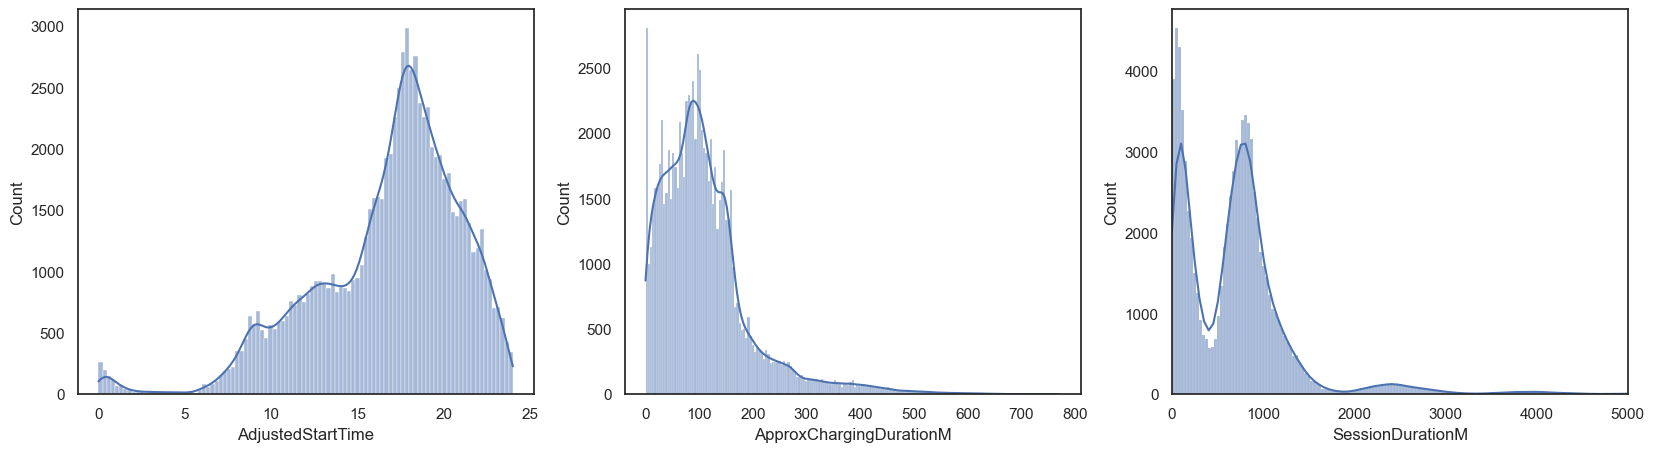

In [342]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
sns.histplot(session_df.AdjustedStartTime.dt.hour + session_df.AdjustedStartTime.dt.minute/60, kde=True, ax=axes[0])
sns.histplot(session_df.ApproxChargingDurationM.astype('float64'), kde=True, ax=axes[1])
sns.histplot(session_df.SessionDurationM.astype('float64'), kde=True, ax=axes[2])
axes[2].set_xlim(0,5000)
plt.show()

### Session Counts

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Cumulative Installations')]

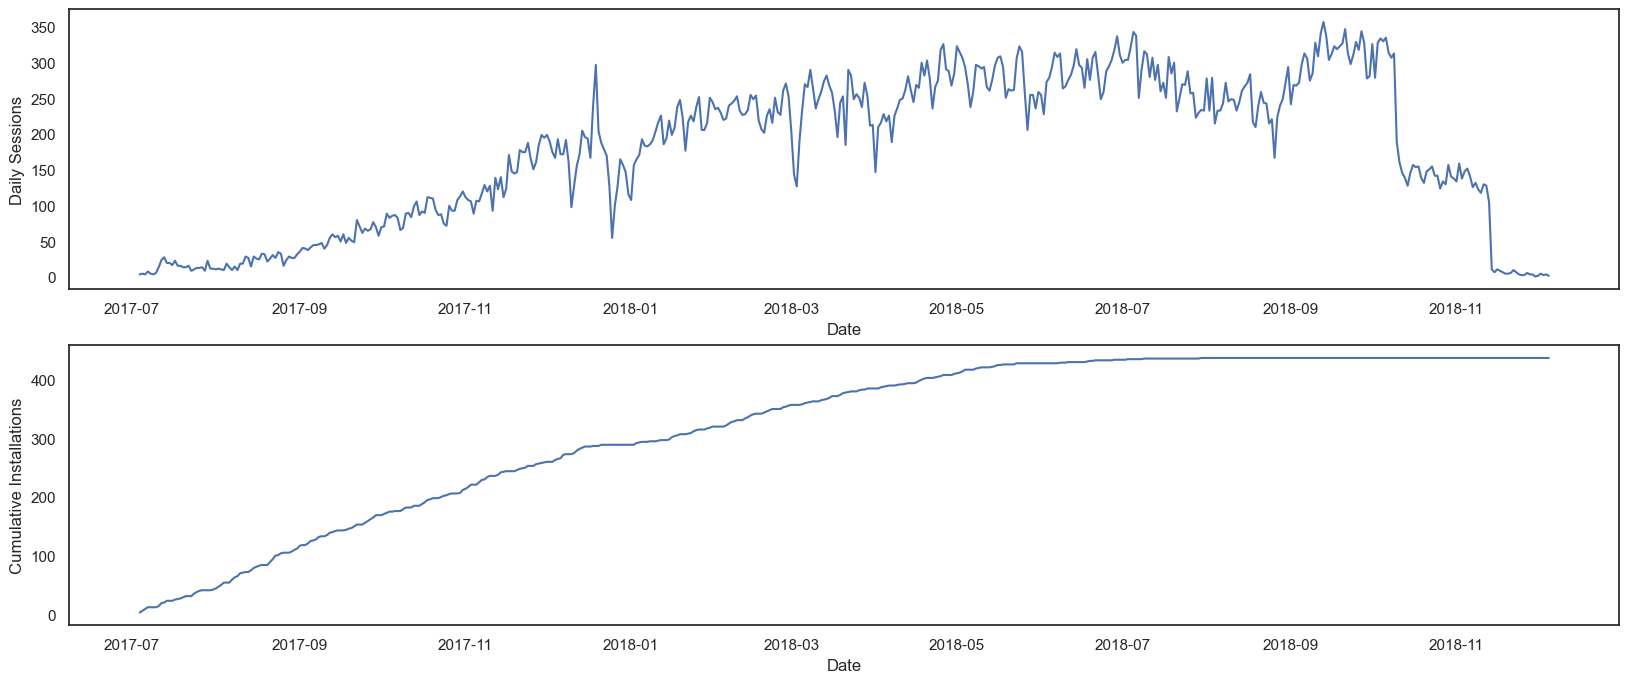

In [237]:
start = session_df_split.AdjustedStartTime.iloc[0].floor(freq='1D')
end = session_df_split.ApproxEndCharge.iloc[-1].ceil(freq='1D')
dt_range = pd.date_range(start, end, freq = 'D')

session_count = []
for d in dt_range:
    session_count.append(len(session_df_split[session_df_split.AdjustedStartTime.dt.floor(freq='1D') == d]))

install_count = []
c=0
for d in dt_range:
    c += len(install_df[install_df.ChargerInstallDate.dt.floor(freq='1D') == d])
    install_count.append(c)

fig, axes = plt.subplots(2, 1, figsize=(20,8))
sns.lineplot(x=dt_range, y=session_count, ax=axes[0])
axes[0].set(xlabel = 'Date', ylabel = 'Daily Sessions')

sns.lineplot(x=dt_range, y=install_count, ax=axes[1])
axes[1].set(xlabel = 'Date', ylabel = 'Cumulative Installations')

In [56]:
session_df.ParticipantID.value_counts()

EN1248    993
EN1117    902
EN1159    658
EN1086    627
EN1454    592
         ... 
EN1551      2
EN1560      2
EN1693      2
EN1472      1
EN1905      1
Name: ParticipantID, Length: 527, dtype: int64

## Session Duration vs Charging duration

In [344]:
session_df['PropSessionCharging'] = session_df.ApproxChargingDurationM / session_df.SessionDurationM
session_df['PropSessionCharging']

0        0.930502
1        0.077586
2        0.056689
3        0.019917
4        0.419786
           ...   
84734    0.539267
84735        0.84
84736         1.0
84737    0.033113
84738    0.026193
Name: PropSessionCharging, Length: 84739, dtype: Float64

c:\Users\iyzf20\Anaconda3\envs\learning-ml-3-8\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\iyzf20\Anaconda3\envs\learning-ml-3-8\lib\site-packages\numpy\core\_methods.py:41: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
c:\Users\iyzf20\Anaconda3\envs\learning-ml-3-8\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\iyzf20\Anaconda3\envs\learning-ml-3-8\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
c:\Users\iyzf20\Anac

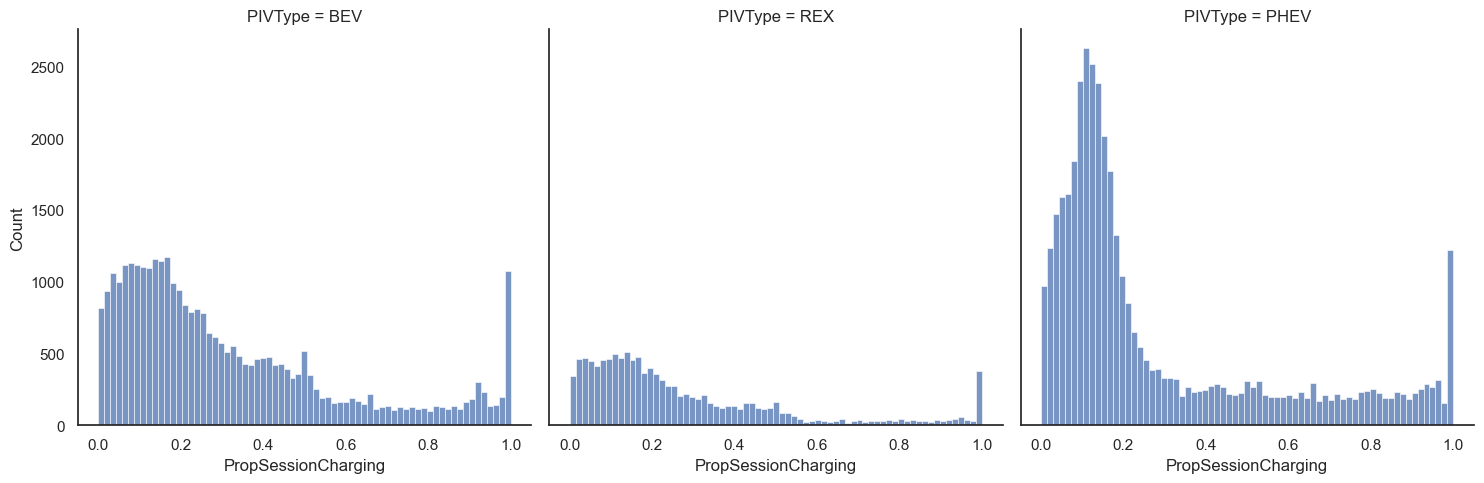

In [345]:
sns.displot(data = session_df, x = 'PropSessionCharging', col = 'PIVType')

c:\Users\iyzf20\Anaconda3\envs\learning-ml-3-8\lib\site-packages\seaborn\distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
c:\Users\iyzf20\Anaconda3\envs\learning-ml-3-8\lib\site-packages\seaborn\distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


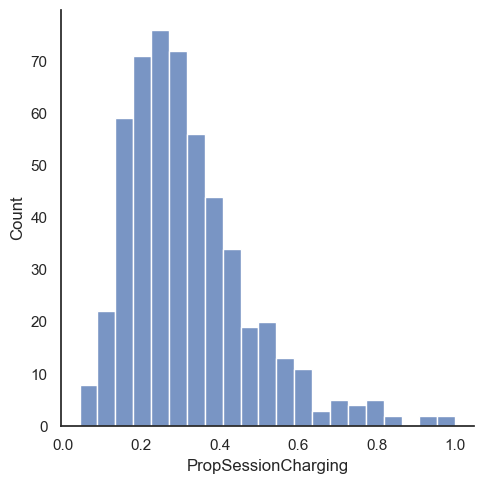

In [241]:
sns.displot(session_df.groupby('ParticipantID')['PropSessionCharging'].mean())

<AxesSubplot: xlabel='ParticipantID'>

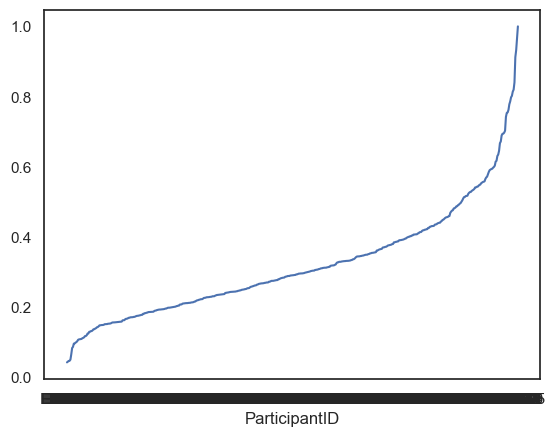

In [242]:
x = session_df.groupby('ParticipantID')['PropSessionCharging'].mean().sort_values().index
y = session_df.groupby('ParticipantID')['PropSessionCharging'].mean().sort_values().values
sns.lineplot(x = x, y = y)

In [250]:
session_df.groupby('ParticipantID')['PropSessionCharging'].mean().sort_values()

ParticipantID
EN1913    0.042768
EN1682      0.0448
EN1905    0.046823
EN1459    0.047162
EN1693    0.050527
            ...   
EN1873    0.840491
EN1844    0.912318
EN1669    0.932602
EN1173    0.966202
EN1595         1.0
Name: PropSessionCharging, Length: 528, dtype: Float64

In [302]:
session_df.groupby('ParticipantID').size()

ParticipantID
EN1003    485
EN1005    157
EN1006    207
EN1007    141
EN1012     55
         ... 
EN1949     35
EN1950    122
EN1951     45
EN1953     32
EN1954     62
Length: 528, dtype: int64

In [303]:
(session_df.groupby('ParticipantID').AdjustedStopTime.max() - session_df.groupby('ParticipantID').AdjustedStartTime.min()).dt.days + 1

ParticipantID
EN1003    453
EN1005    369
EN1006    425
EN1007    253
EN1012    421
         ... 
EN1949    134
EN1950    167
EN1951    163
EN1953    100
EN1954     66
Length: 528, dtype: int64

In [305]:
session_rates = session_df.groupby('ParticipantID').size()/((session_df.groupby('ParticipantID').AdjustedStopTime.max() - session_df.groupby('ParticipantID').AdjustedStartTime.min()).dt.days + 1)

In [306]:
session_rates

ParticipantID
EN1003    1.070640
EN1005    0.425474
EN1006    0.487059
EN1007    0.557312
EN1012    0.130641
            ...   
EN1949    0.261194
EN1950    0.730539
EN1951    0.276074
EN1953    0.320000
EN1954    0.939394
Length: 528, dtype: float64

<AxesSubplot: ylabel='Count'>

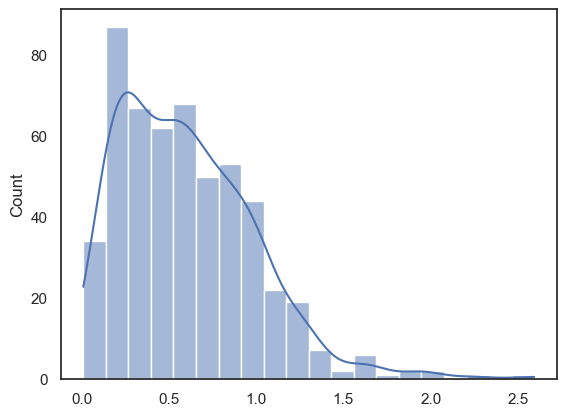

In [313]:
sns.histplot(session_rates, kde='True')

In [337]:
install_df = install_df.set_index('ParticipantID')
install_df['MeanSessionRate'] = session_rates

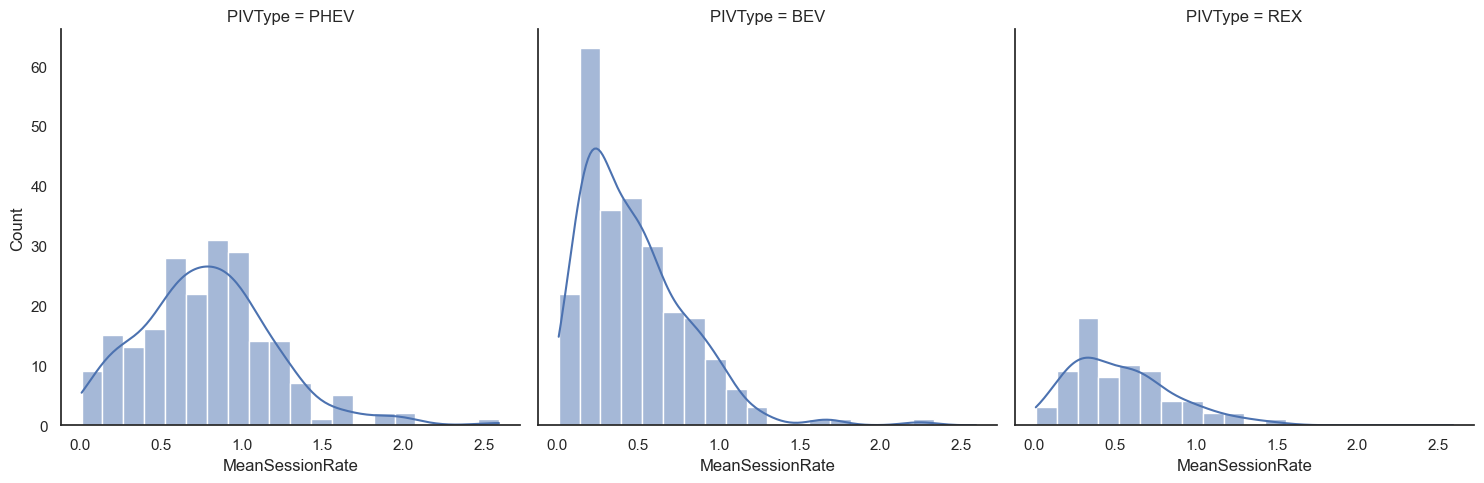

In [346]:
sns.displot(data=install_df, x='MeanSessionRate', col='PIVType', kde='True')

In [252]:
EN1913_df = session_df[session_df.ParticipantID == 'EN1913']
EN1913_df.head(1)

,TransactionID,ChargerID,ParticipantID,StartTime,StopTime,GroupID,Trial,AdjustedStartTime,AdjustedStopTime,SessionDurationM,...,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh,ApproxChargingDurationH,ApproxChargingDurationM,ApproxEndCharge,PropSessionCharging
8888,100245,35000417,EN1913,2017-12-01 13:58:00,2017-12-02 07:31:00,CC0008,1.0,2017-12-01 13:58:00,2017-12-02 07:31:00,1053,...,2018-04-10,BMW,330e,PHEV,3.6,7.6,1.184167,71,2017-12-01 15:09:00,0.067426


## Analysis of a regularly charging individual

In [243]:
EN1117_df = session_df[session_df.ParticipantID == 'EN1117']
EN1117_df.head(1)

,TransactionID,ChargerID,ParticipantID,StartTime,StopTime,GroupID,Trial,AdjustedStartTime,AdjustedStopTime,SessionDurationM,...,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh,ApproxChargingDurationH,ApproxChargingDurationM,ApproxEndCharge,PropSessionCharging
468,8022,UK-GFX-ENA0034,EN1117,2017-08-10 15:35:00,2017-08-11 09:19:00,GF0002,1.0,2017-08-10 16:35:00,2017-08-11 10:19:00,1064,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.657143,39,2017-08-10 17:14:00,0.036654


In [244]:
EN1117_df

,TransactionID,ChargerID,ParticipantID,StartTime,StopTime,GroupID,Trial,AdjustedStartTime,AdjustedStopTime,SessionDurationM,...,ChargerInstallDate,CarMake,CarModel,PIVType,CarkW,CarkWh,ApproxChargingDurationH,ApproxChargingDurationM,ApproxEndCharge,PropSessionCharging
468,8022,UK-GFX-ENA0034,EN1117,2017-08-10 15:35:00,2017-08-11 09:19:00,GF0002,1.0,2017-08-10 16:35:00,2017-08-11 10:19:00,1064,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.657143,39,2017-08-10 17:14:00,0.036654
484,8024,UK-GFX-ENA0034,EN1117,2017-08-11 10:03:00,2017-08-11 10:04:00,GF0002,1.0,2017-08-11 11:03:00,2017-08-11 11:04:00,1,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.014286,1,2017-08-11 11:04:00,1.0
485,8025,UK-GFX-ENA0034,EN1117,2017-08-11 10:04:00,2017-08-11 12:23:00,GF0002,1.0,2017-08-11 11:04:00,2017-08-11 13:23:00,139,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.285714,17,2017-08-11 11:21:00,0.122302
487,8023,UK-GFX-ENA0034,EN1117,2017-08-11 13:04:00,2017-08-11 20:48:00,GF0002,1.0,2017-08-11 14:04:00,2017-08-11 21:48:00,464,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.342857,21,2017-08-11 14:25:00,0.045259
495,8033,UK-GFX-ENA0034,EN1117,2017-08-11 22:12:00,2017-08-12 11:03:00,GF0002,1.0,2017-08-11 23:12:00,2017-08-12 12:03:00,771,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.257143,15,2017-08-11 23:27:00,0.019455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79363,73056,UK-GFX-ENA0034,EN1117,2018-10-07 10:39:00,2018-10-07 11:34:00,GFAppPilot08,2.0,2018-10-07 11:39:00,2018-10-07 12:34:00,55,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.685714,41,2018-10-07 12:20:00,0.745455
79412,73224,UK-GFX-ENA0034,EN1117,2018-10-07 12:51:00,2018-10-08 09:43:00,GFAppPilot08,2.0,2018-10-07 13:51:00,2018-10-08 10:43:00,1252,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.528571,32,2018-10-07 14:23:00,0.025559
79640,73243,UK-GFX-ENA0034,EN1117,2018-10-08 11:16:00,2018-10-08 13:02:00,GFAppPilot08,2.0,2018-10-08 12:16:00,2018-10-08 14:02:00,106,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.671429,40,2018-10-08 12:56:00,0.377358
79654,73379,UK-GFX-ENA0034,EN1117,2018-10-08 13:51:00,2018-10-09 10:33:00,GFAppPilot08,2.0,2018-10-08 14:51:00,2018-10-09 11:33:00,1242,...,2017-04-04,Nissan,Leaf,BEV,7.0,24.0,0.400000,24,2018-10-08 15:15:00,0.019324


In [245]:
start = session_df_split.AdjustedStartTime.iloc[0].floor(freq='D')
end = session_df_split.ApproxEndCharge.iloc[-1].ceil(freq='D')
dt_range = pd.date_range(start, end, freq = 'H')
dt_range[904]

Timestamp('2017-08-10 16:00:00', freq='H')

In [246]:
charging_state = []
for d in dt_range:
    if len(EN1117_df[(EN1117_df.AdjustedStartTime <= d) & (EN1117_df.ApproxEndCharge >= d)]) > 0:
        charging_state.append(1)
    else:
        charging_state.append(0)

sum(charging_state)

501

(17388.5, 17413.5)

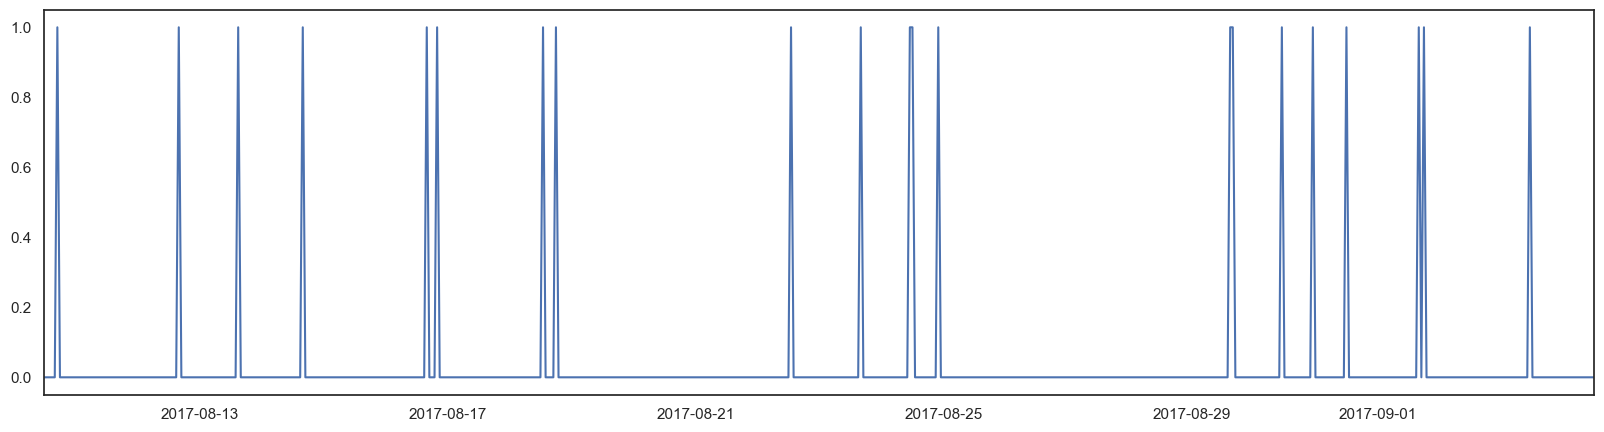

In [247]:
fig, axes = plt.subplots(figsize=(20,5))
sns.lineplot(x=dt_range, y=charging_state)
plt.xlim(dt_range[900], dt_range[1500])

In [248]:
plug_state = []
for d in dt_range:
    if len(EN1117_df[(EN1117_df.AdjustedStartTime <= d) & (EN1117_df.AdjustedStopTime >= d)]) > 0:
        plug_state.append(1)
    else:
        plug_state.append(0)

sum(plug_state)

8576

(17388.5, 17413.5)

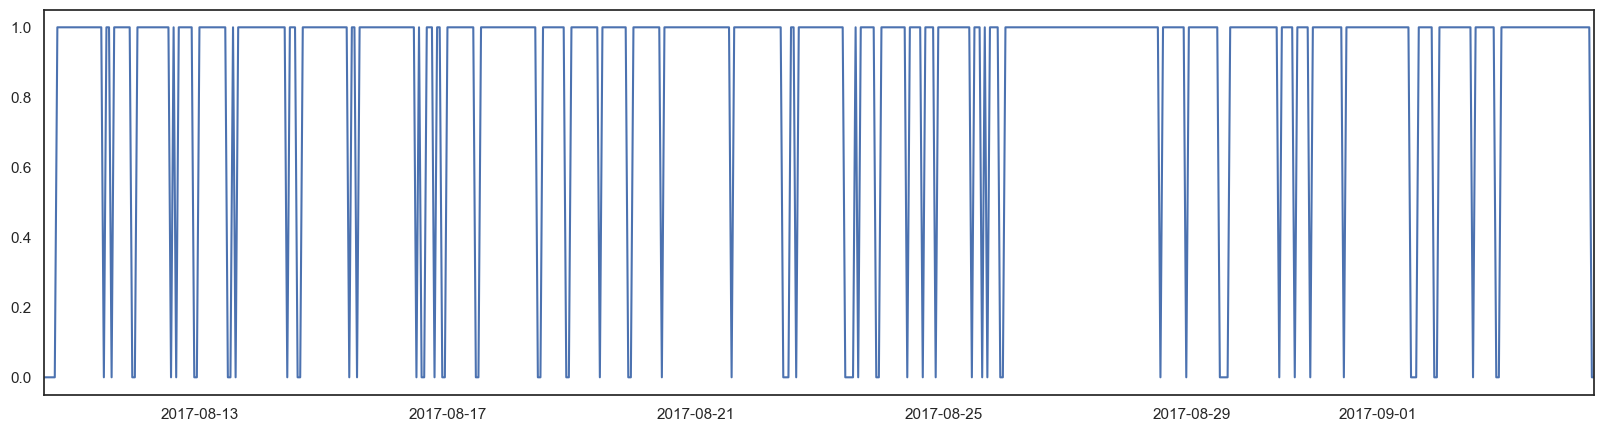

In [249]:
fig, axes = plt.subplots(figsize=(20,5))
sns.lineplot(x=dt_range, y=plug_state)
plt.xlim(dt_range[900], dt_range[1500])

Text(0.5, 0, 'Number of Charging Sessions per Day')

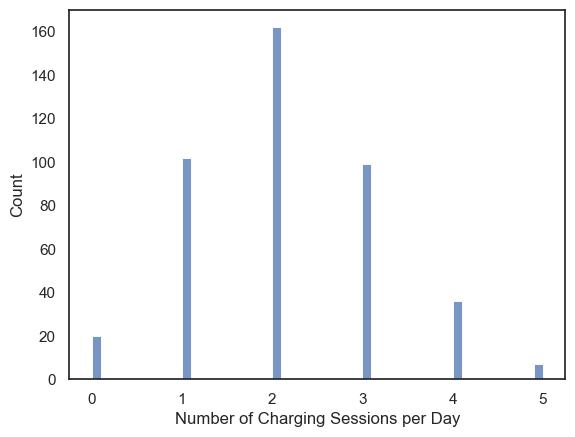

In [112]:
dt_range = pd.date_range(EN1117_df.AdjustedStartTime.iloc[0].floor(freq='D'), EN1117_df.AdjustedStartTime.iloc[-1].floor(freq='D'), freq = 'D')

session_count = []
for d in dt_range:
    session_count.append(len(EN1117_df[EN1117_df.AdjustedStartTime.dt.date == d.date()]))

sns.histplot(session_count, binwidth=0.1)
plt.xlabel('Number of Charging Sessions per Day')